# Modelo con 6 componentes principales que nos muestra el PCA, que recogen un 88% de la información en la que se basará nuestro modelo para aprender patrones


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,precision_recall_curve, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

In [2]:
pd.options.display.max_columns

20

### Siguuiendo los gráficos de PCA con una X con 6 de las columnas más decisivas obtenemos muy buenos resultados

In [18]:
nombres_hominidos = {
    'hominino Orrorin tugenencin': 0,
    'hominino Sahelanthropus tchadensis': 1,
    'hominino Ardipithecus ramidus / kabadda': 2,
    'Ardipithecus Ramidus / Kadabba': 3,
    'Australopithecus Anamensis': 4,
    'Australopithecus Afarensis': 5,
    'Australopithecus Bahrelghazali': 6,
    'Australopithecus Africanus': 7,
    'Australopithecus Garhi': 8,
    'Australopithecus Sediba': 9,
    'Paranthropus Aethiopicus': 10,
    'Paranthropus Robustus': 11,
    'Paranthropus Boisei': 12,
    'Homo Habilis': 13,
    'Homo Rudolfensis': 14,
    'Homo Georgicus': 15,
    'Homo Ergaster': 16,
    'Homo Erectus': 17,
    'Homo Naledi': 18,
    'Homo Floresiensis': 19,
    'Homo Antecesor': 20,
    'Homo Heidelbergensis': 21,
    'Homo Rodhesiensis': 22,
    'Homo Neanderthalensis\n': 23,
    'Homo Sapiens': 24   
}

lista_nombres_hominidos = list(nombres_hominidos.keys())
lista_nombres_hominidos

['hominino Orrorin tugenencin',
 'hominino Sahelanthropus tchadensis',
 'hominino Ardipithecus ramidus / kabadda',
 'Ardipithecus Ramidus / Kadabba',
 'Australopithecus Anamensis',
 'Australopithecus Afarensis',
 'Australopithecus Bahrelghazali',
 'Australopithecus Africanus',
 'Australopithecus Garhi',
 'Australopithecus Sediba',
 'Paranthropus Aethiopicus',
 'Paranthropus Robustus',
 'Paranthropus Boisei',
 'Homo Habilis',
 'Homo Rudolfensis',
 'Homo Georgicus',
 'Homo Ergaster',
 'Homo Erectus',
 'Homo Naledi',
 'Homo Floresiensis',
 'Homo Antecesor',
 'Homo Heidelbergensis',
 'Homo Rodhesiensis',
 'Homo Neanderthalensis\n',
 'Homo Sapiens']

In [3]:
df= pd.read_csv('../data/processed/df_genus_encoded.csv')

In [4]:
df_train= pd.read_csv('../data/train/train2.csv')
df_test= pd.read_csv('../data/test/test2.csv')

In [5]:
X=df_train[['Time', 'Location_encoded',
       'Zone_encoded', 'Habitat_encoded','Cranial_Capacity','Height', 'Incisor_Size_encoded']]
y= df_train['genero_especie_num']

In [6]:
X1=df_test[['Time', 'Location_encoded',
       'Zone_encoded', 'Habitat_encoded','Cranial_Capacity','Height', 'Incisor_Size_encoded']]
y1= df_test['genero_especie_num']

In [7]:
steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', RandomForestClassifier(random_state=42))
]

pipeline = Pipeline(steps)

param_dist = {
    'scaler': [None, StandardScaler(), MinMaxScaler()],
    'pca__n_components': [3,4,5,6],
    'classifier__n_estimators': [100, 500, 1000],
    'classifier__max_depth': [3,5,6,],
    'classifier__max_leaf_nodes': [16,17,18]
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=5, n_iter=10,n_jobs=-1, random_state=42,verbose= 2)


rs=random_search.fit(X, y)


best_score = random_search.best_score_
best_params = random_search.best_params_

print("Best Score:", best_score)
print("Best Parameters:", best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score: 0.9679166666666665
Best Parameters: {'scaler': StandardScaler(), 'pca__n_components': 4, 'classifier__n_estimators': 500, 'classifier__max_leaf_nodes': 18, 'classifier__max_depth': 5}


In [10]:
be4=rs.best_estimator_.fit(X,y)

In [11]:
importances = be4.named_steps['classifier'].feature_importances_
importances

array([0.15503863, 0.26084814, 0.2915117 , 0.29260153])

In [14]:
y_pred_test=be4.predict(X1)
y_pred_proba_test = be4.predict_proba(X1)
#Train
y_pred_train=be4.predict(X)
y_pred_proba_train = be4.predict_proba(X)

In [17]:
precision4 = precision_score(y1, y_pred_test,average='weighted')
recall4 = recall_score(y1, y_pred_test,average='weighted')
f14 = f1_score(y1, y_pred_test,average='weighted')
accuracy4=accuracy_score(y1,y_pred_test)
#roc_auc_4= roc_auc_score(y,y_pred_proba_test,average='weighted',multi_class='ovo')

precision_train4 = precision_score(y, y_pred_train,average='weighted')
recall_train4 = recall_score(y, y_pred_train,average='weighted')
f1_train4 = f1_score(y, y_pred_train,average='weighted')
accuracy_train4=accuracy_score(y,y_pred_train)
#roc_auc_train4= roc_auc_score(y,y_pred_proba_train,average='weighted',multi_class='ovo')
print('TEST')
print("Precision:", precision4)
print("Recall:", recall4)
print("F1-score:", f14)
#print('ROC AUC score:', roc_auc_train4)
print('Accuracy',accuracy4)
print('-'*200)
print('TRAIN')
print("Precision:", precision_train4)
print("Recall:", recall_train4)
print("F1-score:", f1_train4)
#print('ROC AUC score:', roc_auc_train4)
print('Accuracy',accuracy_train4)


TEST
Precision: 0.9706024568294211
Recall: 0.9683333333333334
F1-score: 0.96777550001036
Accuracy 0.9683333333333334
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
TRAIN
Precision: 0.9709938735659144
Recall: 0.9698958333333333
F1-score: 0.9690546916858926
Accuracy 0.9698958333333333


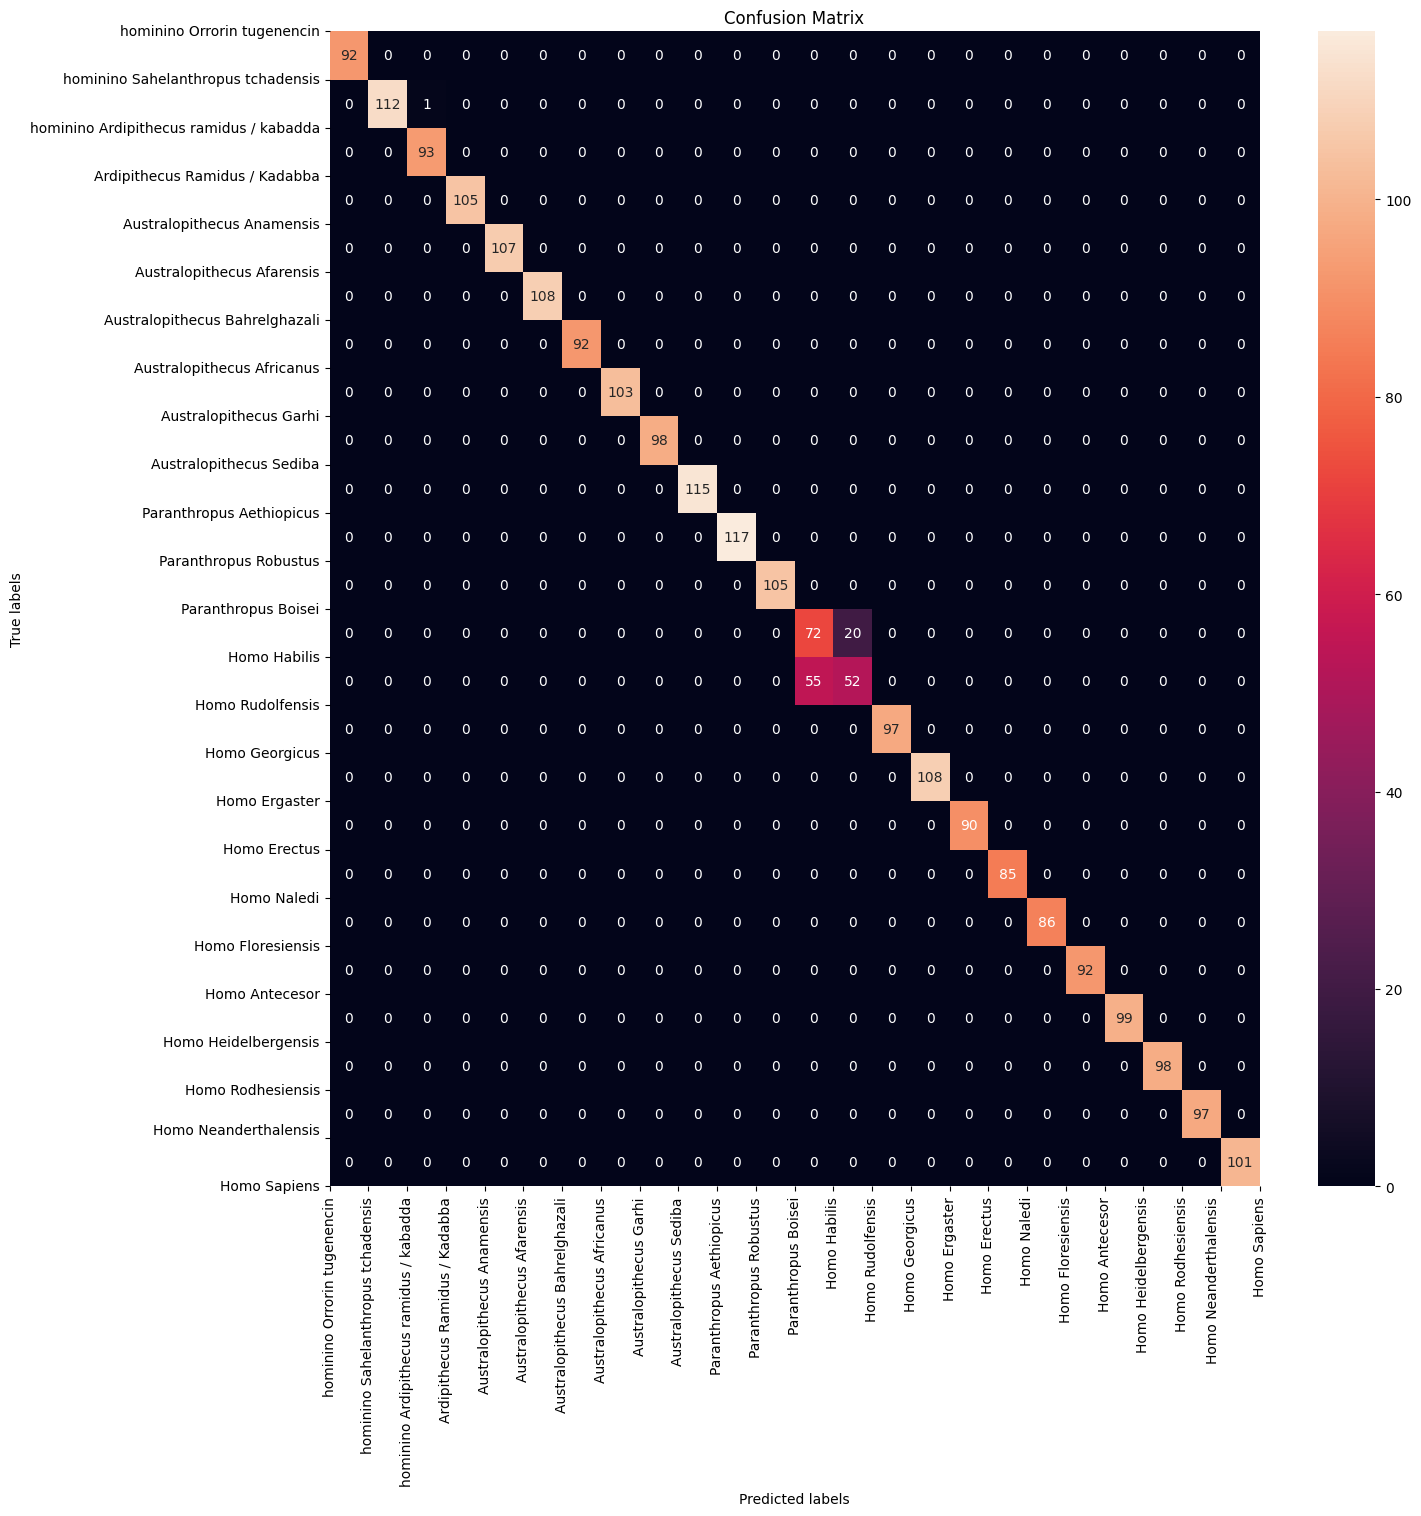

In [19]:
plt.figure(figsize=(15,15))
c_matrix = confusion_matrix(y1,y_pred_test)
sns.heatmap(c_matrix, annot=True,fmt= 'd')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(rotation=90)
plt.xticks(range(len(lista_nombres_hominidos)), lista_nombres_hominidos)
plt.yticks(rotation=360)
plt.yticks(range(len(lista_nombres_hominidos)), lista_nombres_hominidos)
plt.title('Confusion Matrix')
plt.show();

In [20]:
import pickle

filename = '../models/rf_2_pca6.pkl'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(be4, archivo_salida)